In [1]:
import numpy as np
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
df=pd.read_csv("DFP.csv")
df.head()

,DATE,DAY,AD_UNIT_NAME,ORDER_NAME,ADVERTISER_NAME,LINE_ITEM_NAME,Tags_served,Impressions,Clicks,CTR,Revenue,eCPM
0,1/1/2018,1,CarToq_ad_first_story_pos_top (122380182),CarToq Adx,Google Adx,Adsense house ad,74755,72602,0,0.0000,3630.100000,50.000000
1,1/1/2018,1,CarToq_ad_first_story_pos_top (122380182),CarToq Adx,Google Adx,Adsense backup ad,13683,13241,0,0.0000,397.230000,30.000000
2,1/1/2018,1,CarToq_ad_first_story_pos_top (122380182),CarToq Adx,Google Adx,CarToq ad first story pos first,86739,84928,1375,0.0162,5910.674200,69.596296
3,1/1/2018,1,CarToq_ad_first_story_pos_top (122380182),CarToq Adx,Google Adx,Adx Native Ad,94482,91685,1277,0.0139,6124.947976,66.804253
4,1/1/2018,1,CarToq_ad_first_story_pos_middle (122380422),CarToq Adx,Google Adx,Adsense house ad,69605,67661,0,0.0000,3383.050000,50.000000


### 1. DFP data ( DFP.csv ) :
##### 1.1. From Ad_unit_name create new columns for story and position, also separate the data amp / non amp wise.

In [3]:
df["story"]=df["AD_UNIT_NAME"].apply(lambda x:x[x.find("ad_")+3:x.find("_story")] if x.find("ad_")!=-1 else '' )

In [4]:
df["position"]=df["AD_UNIT_NAME"].apply(lambda x: x[x.find("pos_")+4:][:x[x.find("pos_")+4:].find(" ")] if x.find("ad_")!=-1 else x[x.find("cartoq-")+7:x.find("-atf")] )
df["position"]=df["position"].apply(lambda x: x[:x.find(" (")+1] if x.find(" (")!=-1 else x)
df["position"]=df["position"]+"," + df["AD_UNIT_NAME"].apply(lambda x: "Nonamp" if x.find("amp")==-1 else "Amp") 

In [5]:
#output 
df[["AD_UNIT_NAME","story","position"]].head()

,AD_UNIT_NAME,story,position
0,CarToq_ad_first_story_pos_top (122380182),first,"top,Nonamp"
1,CarToq_ad_first_story_pos_top (122380182),first,"top,Nonamp"
2,CarToq_ad_first_story_pos_top (122380182),first,"top,Nonamp"
3,CarToq_ad_first_story_pos_top (122380182),first,"top,Nonamp"
4,CarToq_ad_first_story_pos_middle (122380422),first,"middle,Nonamp"


##### 1.2. Map the DAY data with day of the week name.

In [6]:
map_day={1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday",7:"Sunday"}
df["Day(name)"]=df["DAY"].apply(lambda x: map_day[x])

In [7]:
#output 
df.head()

,DATE,DAY,AD_UNIT_NAME,ORDER_NAME,ADVERTISER_NAME,LINE_ITEM_NAME,Tags_served,Impressions,Clicks,CTR,Revenue,eCPM,story,position,Day(name)
0,1/1/2018,1,CarToq_ad_first_story_pos_top (122380182),CarToq Adx,Google Adx,Adsense house ad,74755,72602,0,0.0000,3630.100000,50.000000,first,"top,Nonamp",Monday
1,1/1/2018,1,CarToq_ad_first_story_pos_top (122380182),CarToq Adx,Google Adx,Adsense backup ad,13683,13241,0,0.0000,397.230000,30.000000,first,"top,Nonamp",Monday
2,1/1/2018,1,CarToq_ad_first_story_pos_top (122380182),CarToq Adx,Google Adx,CarToq ad first story pos first,86739,84928,1375,0.0162,5910.674200,69.596296,first,"top,Nonamp",Monday
3,1/1/2018,1,CarToq_ad_first_story_pos_top (122380182),CarToq Adx,Google Adx,Adx Native Ad,94482,91685,1277,0.0139,6124.947976,66.804253,first,"top,Nonamp",Monday
4,1/1/2018,1,CarToq_ad_first_story_pos_middle (122380422),CarToq Adx,Google Adx,Adsense house ad,69605,67661,0,0.0000,3383.050000,50.000000,first,"middle,Nonamp",Monday


##### 1.3. [ Revenue = Total Impression * eCPM ], but here eCPM for some data is incorrect, merge the Actual_eCPM data from the other sheet ( Actual_eCPM.csv ) such that new column for Actual_eCPM is created. 

In [8]:
df1=pd.read_csv("Actual_eCPM.csv")
actual_eCPM={df1.iloc[itr][0]:df1.iloc[itr][1] for itr in range(0,len(df1)) if df1.iloc[itr][1]!="-"}
df["Actual_eCPM"]=[actual_eCPM [df["LINE_ITEM_NAME"].iloc[itr]] if df["LINE_ITEM_NAME"].iloc[itr] in actual_eCPM else df["eCPM"].iloc[itr] for itr in range(0,len(df)) ]
df["Actual_eCPM"]=df["Actual_eCPM"].astype(float)

##### Now create another column “Actual_Revenue” which is defined as [ Actual_Revenue = Total Impression * Actual_eCPM]

In [9]:
df["Actual_Revenue"]=(df["Impressions"]*df["Actual_eCPM"])/1000

In [10]:
#output 
df.head()

,DATE,DAY,AD_UNIT_NAME,ORDER_NAME,ADVERTISER_NAME,LINE_ITEM_NAME,Tags_served,Impressions,Clicks,CTR,Revenue,eCPM,story,position,Day(name),Actual_eCPM,Actual_Revenue
0,1/1/2018,1,CarToq_ad_first_story_pos_top (122380182),CarToq Adx,Google Adx,Adsense house ad,74755,72602,0,0.0000,3630.100000,50.000000,first,"top,Nonamp",Monday,50.000000,3630.100000
1,1/1/2018,1,CarToq_ad_first_story_pos_top (122380182),CarToq Adx,Google Adx,Adsense backup ad,13683,13241,0,0.0000,397.230000,30.000000,first,"top,Nonamp",Monday,30.000000,397.230000
2,1/1/2018,1,CarToq_ad_first_story_pos_top (122380182),CarToq Adx,Google Adx,CarToq ad first story pos first,86739,84928,1375,0.0162,5910.674200,69.596296,first,"top,Nonamp",Monday,69.596296,5910.674227
3,1/1/2018,1,CarToq_ad_first_story_pos_top (122380182),CarToq Adx,Google Adx,Adx Native Ad,94482,91685,1277,0.0139,6124.947976,66.804253,first,"top,Nonamp",Monday,66.804253,6124.947936
4,1/1/2018,1,CarToq_ad_first_story_pos_middle (122380422),CarToq Adx,Google Adx,Adsense house ad,69605,67661,0,0.0000,3383.050000,50.000000,first,"middle,Nonamp",Monday,50.000000,3383.050000


##### After completing this 3 task save the sheet as “DFP_solution.csv”

In [11]:
df.to_csv("DFP_solution.csv",index=False)

##### 1.4 Find the best performing Ad position in terms of eCPM and revenue differently in amp and non-amp case.

In [12]:
df=pd.read_csv("DFP_solution.csv")
df["case"]=df["position"].apply(lambda x: x[x.find(",")+1:])
df["position_only"]=df["position"].apply(lambda x: x[:x.find(",")])

In [13]:
df_best_position=df[["position_only","case","Actual_eCPM","Actual_Revenue"]]

In [14]:
df_stats_best_pos=df_best_position.groupby(["position_only","case"],as_index=False).mean()

In [15]:
df_stats_best_pos.sort_values("Actual_Revenue")

,position_only,case,Actual_eCPM,Actual_Revenue
3,leaderboard,Nonamp,56.169572,36.650018
6,passback,Nonamp,19.292450,49.365553
1,bottom,Nonamp,81.522138,337.999185
4,middle,Nonamp,79.427481,387.406755
8,top,Nonamp,74.922049,593.357500
5,middle,Amp,45.114953,691.786065
2,bottom,Amp,46.970754,721.733975
7,top,Amp,60.740922,915.280137
0,afterrelated,Amp,53.873399,926.705768


##### Submit this data as “Adpos.csv”

In [16]:
df_stats_best_pos.sort_values("Actual_Revenue").to_csv("Adpos.csv",index=False)

##### 1.5 Also find top 5 Advertiser and Line Item name separately month wise ( combining both Amp and Non-Amp )for last 3 months, and save this in separate sheet as “Top5.csv”

In [17]:
#Note the top 5 metric was not mentioned in the assignment.pdf
#Metirc for sort: Actual Revenue (in code)

df["month"]=df["DATE"].apply(lambda x: parser.parse(x).date().strftime("%b"))
last_month=['May', 'Jun', 'Jul']

In [18]:
df_filter=df[df["month"].isin(last_month)]
df_filter=df_filter[["ADVERTISER_NAME","LINE_ITEM_NAME","Actual_Revenue","month"]]

#Top 5 Advertiser Name
df_top=df_filter.groupby(["month","ADVERTISER_NAME"],as_index=False).mean()
df_top_revenue=pd.DataFrame()
for mnth in list(df_top["month"].unique()):
    df_month=df_top[df_top["month"]==mnth].sort_values("Actual_Revenue",ascending=False).reset_index().head(5)
    df_top_revenue=pd.concat([df_top_revenue,df_month])
df_top_revenue.reset_index().drop(["index","level_0"],axis=1)

,month,ADVERTISER_NAME,Actual_Revenue
0,Jul,Teads.tv,6789.932273
1,Jul,Droom,818.663165
2,Jul,Google Adx,601.337914
3,Jul,Maruti Non Nexa,541.896145
4,Jul,Adterra,422.430000
5,Jun,Teads.tv,4737.549900
6,Jun,Kia Motors,2777.850000
7,Jun,Google Adx,593.089177
8,Jun,Adterra,528.210123
9,Jun,Cars24,119.346930


In [19]:
df_top_revenue.reset_index().drop(["index","level_0"],axis=1).to_csv("Top5_Advertiser_Name.csv",index=False)

In [20]:
#Top 5 LINE_ITEM_NAME
df_top=df_filter.groupby(["month","LINE_ITEM_NAME"],as_index=False).mean()
df_top_revenue=pd.DataFrame()
for mnth in list(df_top["month"].unique()):
    df_month=df_top[df_top["month"]==mnth].sort_values("Actual_Revenue",ascending=False).reset_index().head(5)
    df_top_revenue=pd.concat([df_top_revenue,df_month])
df_top_revenue.reset_index().drop(["index","level_0"],axis=1)

,month,LINE_ITEM_NAME,Actual_Revenue
0,Jul,Teads AMP Bottom Ad Unit,7002.111375
1,Jul,AMP pages adx,1068.675514
2,Jul,Droom-Cartoq-PG-Deal,818.663165
3,Jul,Adx Native Ad,759.581567
4,Jul,SCross-cartoq-adglobal360 PG,541.896145
5,Jun,Teads AMP Bottom Ad Unit,12674.434667
6,Jun,Teads Live Campaign,3124.494750
7,Jun,KIA Video campaign,2777.850000
8,Jun,AMP pages adx,1089.313408
9,Jun,CarToq Adx All Story Pages,1039.196797


In [21]:
df_top_revenue.reset_index().drop(["index","level_0"],axis=1).to_csv("Top5_List_item_Name.csv",index=False)

##### 1.6. Create a stacked bar plot showing contribution of “Google Adx”, ”Google Adsense” ( this are Advertiser_Name ) in Total Actual Revenue for the last 3 months. (You can plot this graph with any tool you want.)

In [22]:
df_filter=df_filter[["ADVERTISER_NAME","Actual_Revenue","month"]]
df_sum=df_filter.groupby(["month","ADVERTISER_NAME"],as_index=False).sum()
df_sum=df_sum.sort_values("Actual_Revenue",ascending=False)

adv_list=["Google Adx","Google Adsense"]
google_adx=df_sum[df_sum["ADVERTISER_NAME"]=="Google Adx"]
google_asx=df_sum[df_sum["ADVERTISER_NAME"]=="Google Adsense"]

df_others=df_sum[-(df_sum["ADVERTISER_NAME"].isin(adv_list))]

others=df_others.groupby(["month"]).sum().to_dict()["Actual_Revenue"]
google_adx=google_adx[["month","Actual_Revenue"]].set_index("month").to_dict()["Actual_Revenue"]
google_asx=google_asx[["month","Actual_Revenue"]].set_index("month").to_dict()["Actual_Revenue"]
google_adx['Company']="Google Adx"
google_asx['Company']="Google Adsense"
others['Company']="Others"
data=[others,google_adx,google_asx]
df=pd.DataFrame(data)

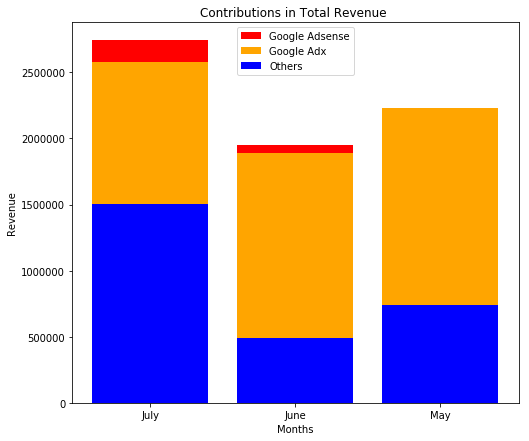

In [24]:
df.replace(np.nan,0)
others=df[df["Company"]=="Others"][["Jul","Jun","May"]].values[0]
adx=df[df["Company"]=="Google Adx"][["Jul","Jun","May"]].values[0]
asx=df[df["Company"]=="Google Adsense"][["Jul","Jun","May"]].values[0]
space=[sum(x) for x in zip(others, adx)]
plt.figure(figsize=(8,7))
plt.bar([1,2,3],[sum(x) for x in zip(space,asx)],color="red",label="Google Adsense")
plt.bar([1,2,3],space,color="orange",label="Google Adx")
plt.bar([1,2,3],others,color="blue",label="Others")
plt.xticks([1,2,3],["July","June","May"])
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.title("Contributions in Total Revenue ")
plt.legend()
plt.show()